In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"D:\Data Analysis Projects\Customer Lifetime Value\customer_acquisition_data.csv")
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


### Visualizing the distribution of acquisition cost and revenue generated by the customer using histograms

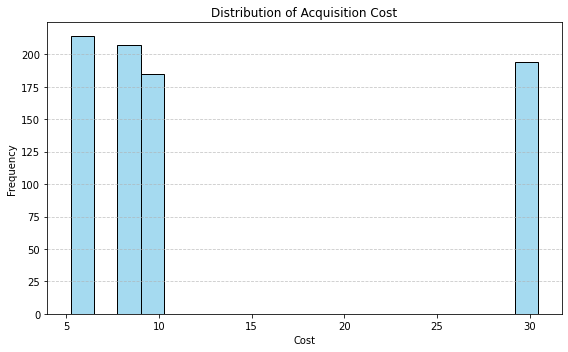

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="cost", bins=20, kde=False, color='skyblue', edgecolor='black')

plt.title("Distribution of Acquisition Cost")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

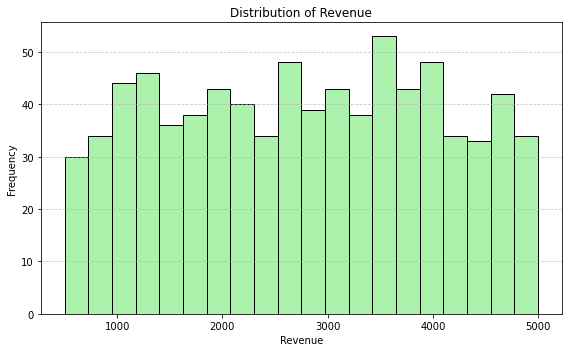

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="revenue", bins=20, kde=False, color='lightgreen', edgecolor='black')

plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

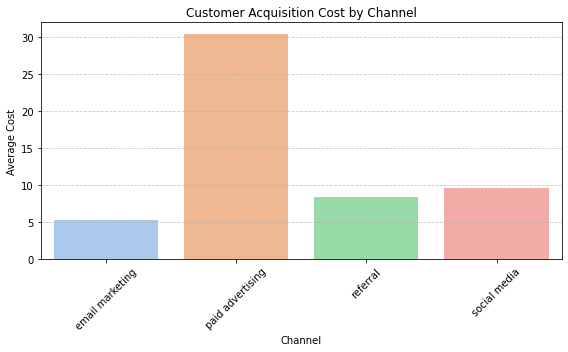

In [5]:
# Prepare data
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=cost_by_channel, x='channel', y='cost', palette='pastel')

plt.title("Customer Acquisition Cost by Channel")
plt.xlabel("Channel")
plt.ylabel("Average Cost")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Paid advertisement is the most expensive channel, and email marketing is the least expensive channel.

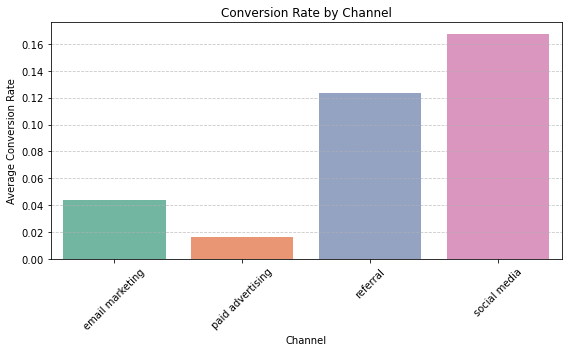

In [6]:
# Prepare data
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=conversion_by_channel, x='channel', y='conversion_rate', palette='Set2')

plt.title("Conversion Rate by Channel")
plt.xlabel("Channel")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Social media is the most effective channel for converting customers, while paid advertising is the least effective.

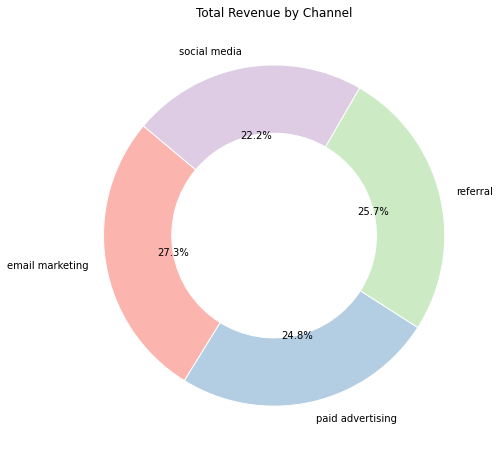

In [7]:
# Prepare data
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(7, 7))
colors = plt.cm.Pastel1.colors  # Use a pastel color palette


plt.pie(revenue_by_channel['revenue'], 
        labels=revenue_by_channel['channel'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        wedgeprops={'width': 0.4, 'edgecolor': 'w'})

plt.title("Total Revenue by Channel")
plt.tight_layout()
plt.show()

#### Email marketing is the most profitable channel in terms of generating revenue.

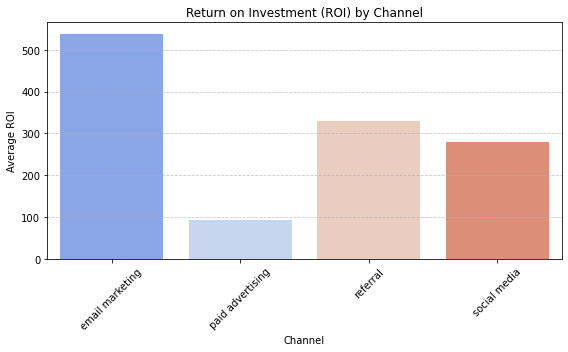

In [8]:
# Calculate ROI
data['roi'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=roi_by_channel, x='channel', y='roi', palette='coolwarm')

plt.title("Return on Investment (ROI) by Channel")
plt.xlabel("Channel")
plt.ylabel("Average ROI")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### ROI from email marketing is way higher than all other channels, while the ROI from paid advertising is the lowest.

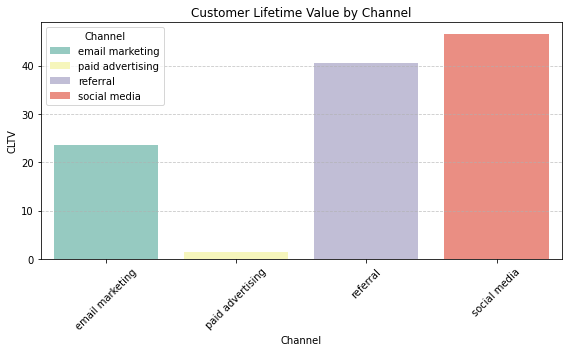

In [9]:
# Calculate CLTV
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=channel_cltv, x='channel', y='cltv', hue='channel', dodge=False, palette='Set3')

plt.title("Customer Lifetime Value by Channel")
plt.xlabel("Channel")
plt.ylabel("CLTV")
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The customer lifetime value from Social Media is the highest.

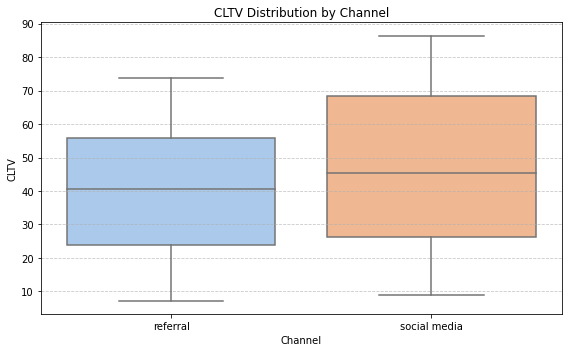

In [10]:
# Filter the subset
subset = data[data['channel'].isin(['social media', 'referral'])]

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=subset, x='channel', y='cltv', palette='pastel')

plt.title("CLTV Distribution by Channel")
plt.xlabel("Channel")
plt.ylabel("CLTV")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The Customer Lifetime Value from the Social Media channel is slightly better than the referral channel.

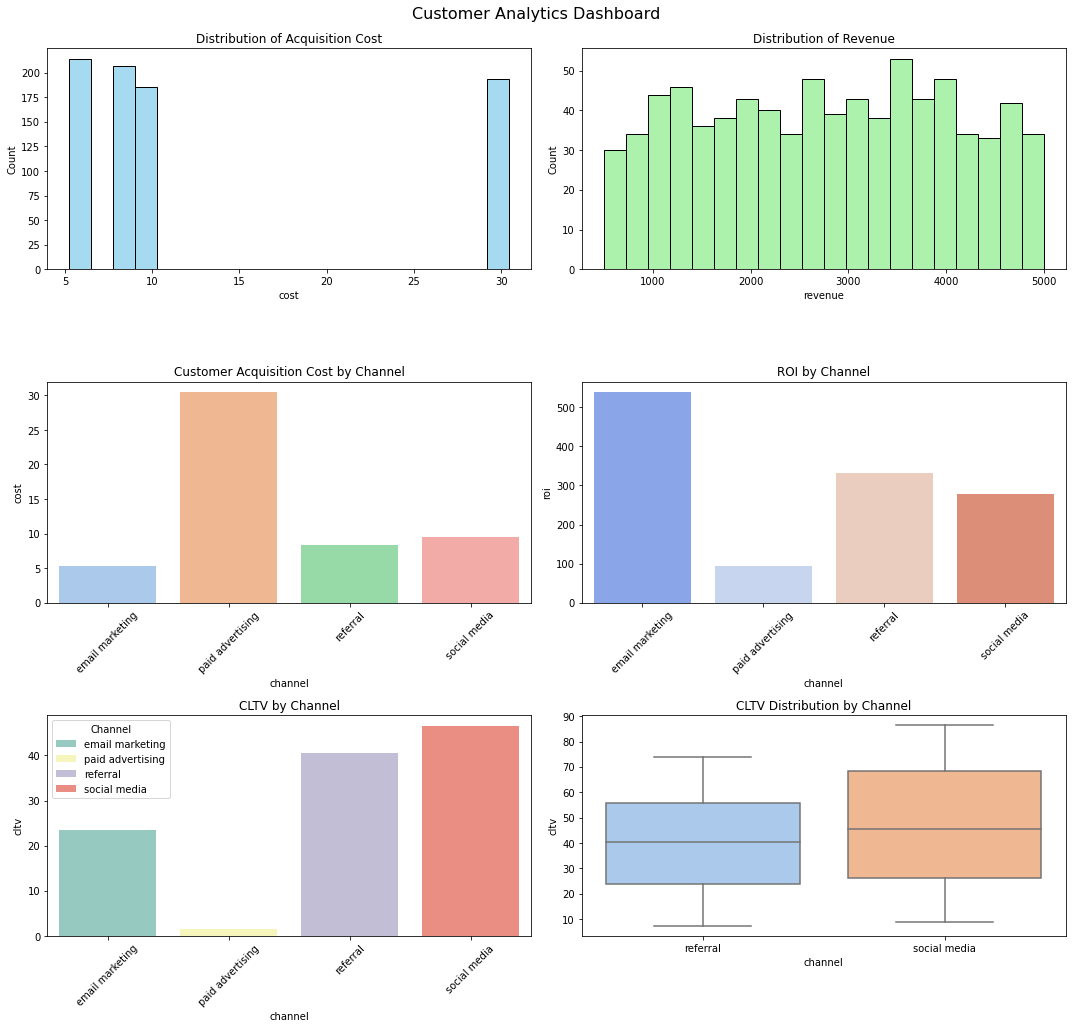

In [11]:

# Customer Analytics Dashboard

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Customer Analytics Dashboard", fontsize=16, y=0.95)

# Plot 1: Acquisition Cost
sns.histplot(data=data, x='cost', bins=20, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title("Distribution of Acquisition Cost")

# Plot 2: Histogram - Revenue
sns.histplot(data=data, x='revenue', bins=20, ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title("Distribution of Revenue")

# Plot 3: Cost by Channel
sns.barplot(data=cost_by_channel, x='channel', y='cost', ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title("Customer Acquisition Cost by Channel")
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: ROI by Channel
sns.barplot(data=roi_by_channel, x='channel', y='roi', ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title("ROI by Channel")
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot 5: CLTV by Channel
sns.barplot(data=channel_cltv, x='channel', y='cltv', hue='channel', dodge=False, ax=axes[2, 0], palette='Set3')
axes[2, 0].set_title("CLTV by Channel")
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].legend(title='Channel')

# Plot 6: CLTV Distribution for Selected Channels
subset = data[data['channel'].isin(['social media', 'referral'])]
sns.boxplot(data=subset, x='channel', y='cltv', ax=axes[2, 1], palette='pastel')
axes[2, 1].set_title("CLTV Distribution by Channel")

# Layout fix
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
